In [125]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import RandomOverSampler   
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# from imblearn.over_sampling import SMOTE,ADASYN

In [126]:
df=pd.read_csv('US_Heart_Patients.csv')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

In [128]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,...,BMI,heartRate,glucose,Heart-Att,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,...,26.97,80.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,...,28.73,95.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,...,25.34,75.0,70.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,...,28.58,65.0,103.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,...,23.10,85.0,85.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,...,22.00,84.0,86.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,...,19.16,86.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,...,21.47,80.0,107.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,...,25.60,67.0,72.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

In [130]:
df=df.loc[:,~df.columns.str.startswith('Unnamed')]
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [132]:
round((df.describe().mean()).T,2)


age                568.14
education          518.00
currentSmoker      530.00
cigsPerDay         539.99
BP Meds            522.65
prevalentStroke    529.01
prevalentHyp       530.10
diabetes           529.90
tot cholesterol    745.91
Systolic BP        644.74
Diastolic BP       595.91
BMI                549.34
heartRate          592.11
glucose            578.11
Heart-Att          530.19
dtype: float64

In [133]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
education,4130.0,1.98,1.02,1.00,1.00,2.0,3.00,4.0
currentSmoker,4237.0,0.49,0.50,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
BP Meds,4180.0,0.03,0.17,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4231.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4238.0,0.31,0.46,0.00,0.00,0.0,1.00,1.0
diabetes,4238.0,0.03,0.16,0.00,0.00,0.0,0.00,1.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0


In [134]:
df.isnull().any().any() # first .any() column-wise, second for the result obtained by each col

True

In [135]:
df.isnull().sum() # col wise null value sum

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [136]:
df.isnull().sum()*100/df.shape[0]

Gender             0.188679
age                0.047170
education          2.594340
currentSmoker      0.070755
cigsPerDay         0.731132
BP Meds            1.415094
prevalentStroke    0.212264
prevalentHyp       0.047170
diabetes           0.047170
tot cholesterol    1.415094
Systolic BP        0.094340
Diastolic BP       0.117925
BMI                0.566038
heartRate          0.094340
glucose            9.221698
Heart-Att          0.000000
dtype: float64

Dividing df into num and cat

In [137]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [138]:
cat=['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Heart-Att']
num=['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose']

In [139]:
len(cat) + len(num)

16

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
education,4130.0,1.979903,1.019943,1.00,1.00,2.000,3.00,4.0
currentSmoker,4237.0,0.494218,0.500026,0.00,0.00,0.000,1.00,1.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
BP Meds,4180.0,0.029665,0.169682,0.00,0.00,0.000,0.00,1.0
prevalentStroke,4231.0,0.005909,0.076650,0.00,0.00,0.000,0.00,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.000,1.00,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.000,0.00,1.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [142]:
df[cat].describe().mode().T

,0
education,1.0
currentSmoker,0.0
BP Meds,0.0
prevalentStroke,0.0
prevalentHyp,0.0
diabetes,0.0
Heart-Att,0.0


### Null Value Treatment

In [143]:
for i in num:
    df[i].fillna(df[i].mean(), inplace=True)

In [144]:
df[cat]

,Gender,education,currentSmoker,BP Meds,prevalentStroke,prevalentHyp,diabetes,Heart-Att
0,Male,4.0,0.0,0.0,0.0,0.0,0.0,0
1,Female,2.0,0.0,0.0,0.0,0.0,0.0,0
2,Male,1.0,1.0,0.0,0.0,0.0,0.0,0
3,Female,3.0,1.0,0.0,0.0,1.0,0.0,1
4,Female,3.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
4235,Female,2.0,1.0,NaN,0.0,0.0,0.0,0
4236,Female,1.0,1.0,0.0,0.0,0.0,0.0,0
4237,Female,2.0,0.0,0.0,0.0,0.0,0.0,0
4238,Male,3.0,0.0,0.0,0.0,1.0,0.0,0


In [145]:
for i in cat:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BP Meds          4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot cholesterol  4240 non-null   float64
 10  Systolic BP      4240 non-null   float64
 11  Diastolic BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [147]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [148]:
df[cat]

,Gender,education,currentSmoker,BP Meds,prevalentStroke,prevalentHyp,diabetes,Heart-Att
0,Male,4.0,0.0,0.0,0.0,0.0,0.0,0
1,Female,2.0,0.0,0.0,0.0,0.0,0.0,0
2,Male,1.0,1.0,0.0,0.0,0.0,0.0,0
3,Female,3.0,1.0,0.0,0.0,1.0,0.0,1
4,Female,3.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
4235,Female,2.0,1.0,0.0,0.0,0.0,0.0,0
4236,Female,1.0,1.0,0.0,0.0,0.0,0.0,0
4237,Female,2.0,0.0,0.0,0.0,0.0,0.0,0
4238,Male,3.0,0.0,0.0,0.0,1.0,0.0,0


In [149]:
df[num]

,age,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,81.951936
4237,52.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000
4238,40.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000


In [150]:
df['Gender']

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
4235    Female
4236    Female
4237    Female
4238      Male
4239    Female
Name: Gender, Length: 4240, dtype: object

In [151]:
df['Gender'].replace(to_replace=['Male','Female'], value=[1,0])

0       1
1       0
2       1
3       0
4       0
       ..
4235    0
4236    0
4237    0
4238    1
4239    0
Name: Gender, Length: 4240, dtype: int64

In [152]:
df['Gender'].replace(to_replace=['Male', 'Female'], value=[1,0], inplace=True)  

In [153]:
df['Gender']

0       1
1       0
2       1
3       0
4       0
       ..
4235    0
4236    0
4237    0
4238    1
4239    0
Name: Gender, Length: 4240, dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BP Meds          4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot cholesterol  4240 non-null   float64
 10  Systolic BP      4240 non-null   float64
 11  Diastolic BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 530.1 KB


In [155]:
# sns.pairplot(df[[num]])
df[num]

,age,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,81.951936
4237,52.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000
4238,40.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000


In [156]:
df.corr()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
Gender,1.000000,-0.029170,0.014390,0.196498,0.315115,-0.051385,-0.004478,0.006936,0.015850,-0.069655,-0.034835,0.059763,0.082544,-0.116232,0.006491,0.088789
age,-0.029170,1.000000,-0.164545,-0.212611,-0.192126,0.121059,0.057701,0.305889,0.101356,0.260678,0.394109,0.205365,0.134434,-0.011275,0.116340,0.226012
education,0.014390,-0.164545,1.000000,0.019137,0.010751,-0.010109,-0.032854,-0.077630,-0.038099,-0.022995,-0.125394,-0.061893,-0.138625,-0.051158,-0.034353,-0.052703
currentSmoker,0.196498,-0.212611,0.019137,1.000000,0.766571,-0.048266,-0.032944,-0.103932,-0.044209,-0.046170,-0.130666,-0.108517,-0.166076,0.061302,-0.053681,0.018334
cigsPerDay,0.315115,-0.192126,0.010751,0.766571,1.000000,-0.045642,-0.032697,-0.066772,-0.037045,-0.026009,-0.089027,-0.056903,-0.092883,0.074317,-0.055601,0.057811
BP Meds,-0.051385,0.121059,-0.010109,-0.048266,-0.045642,1.000000,0.114614,0.258722,0.051407,0.078489,0.251469,0.192241,0.099932,0.015336,0.048969,0.086448
prevalentStroke,-0.004478,0.057701,-0.032854,-0.032944,-0.032697,0.114614,1.000000,0.074846,0.006955,0.000144,0.056984,0.045138,0.024932,-0.017646,0.018107,0.061823
prevalentHyp,0.006936,0.305889,-0.077630,-0.103932,-0.066772,0.258722,0.074846,1.000000,0.077851,0.163212,0.695854,0.614891,0.300252,0.147413,0.082546,0.176290
diabetes,0.015850,0.101356,-0.038099,-0.044209,-0.037045,0.051407,0.006955,0.077851,1.000000,0.039281,0.112472,0.051080,0.086504,0.049260,0.605922,0.097344
tot cholesterol,-0.069655,0.260678,-0.022995,-0.046170,-0.026009,0.078489,0.000144,0.163212,0.039281,1.000000,0.207318,0.162589,0.114714,0.090927,0.044790,0.081822


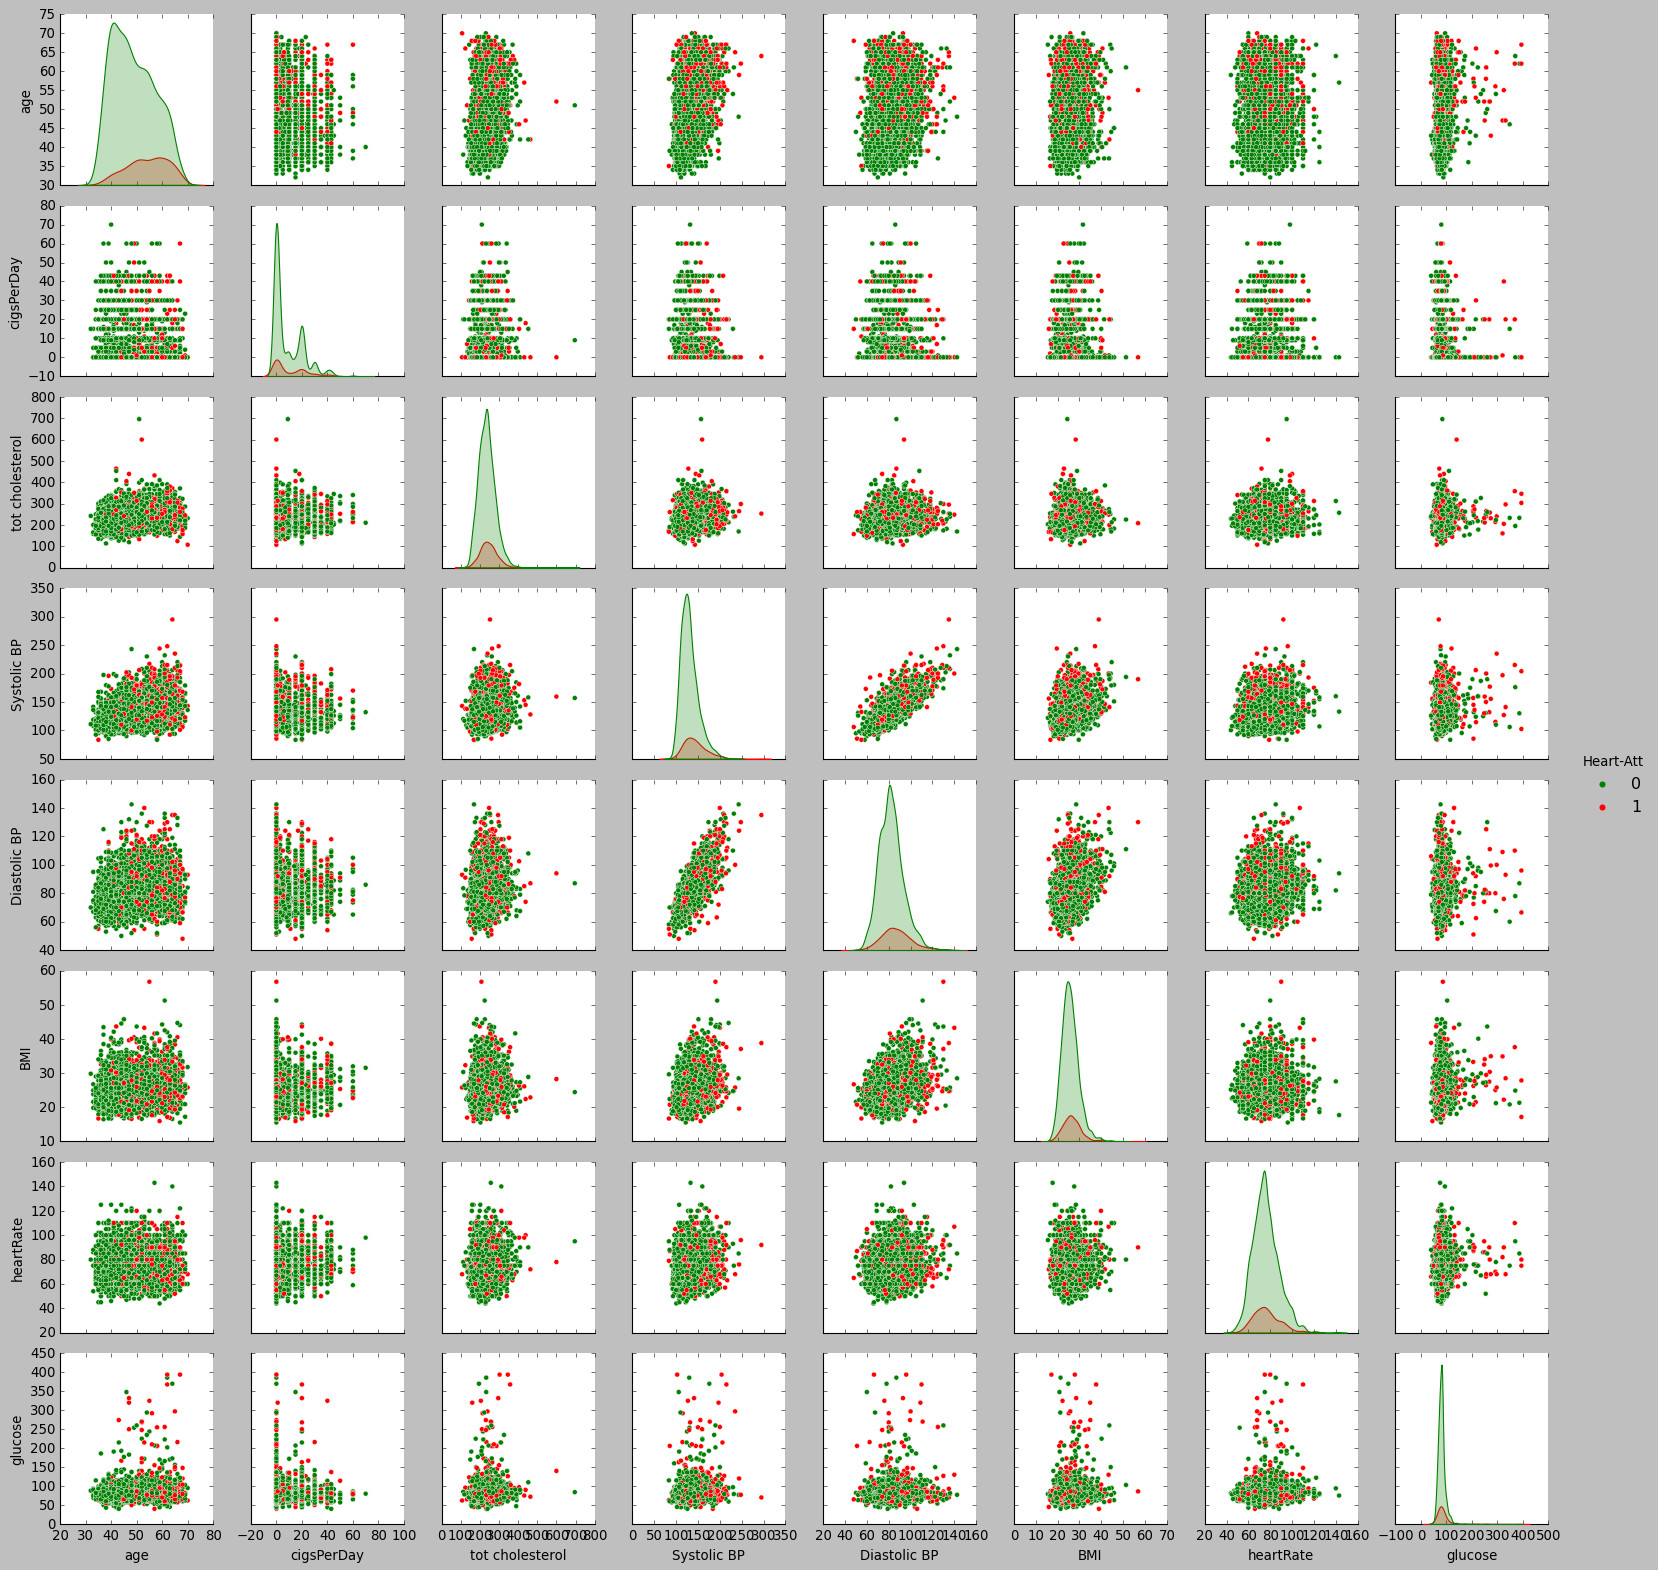

In [157]:
sns.pairplot(df[num+['Heart-Att']],hue="Heart-Att", palette=["Green", "Red"])

In [158]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Gender,4240.0,0.43,0.49,0.00,0.00,0.00,1.00,1.0
age,4240.0,49.58,8.57,32.00,42.00,49.00,56.00,70.0
education,4240.0,1.95,1.02,1.00,1.00,2.00,3.00,4.0
currentSmoker,4240.0,0.49,0.50,0.00,0.00,0.00,1.00,1.0
cigsPerDay,4240.0,9.00,11.88,0.00,0.00,0.00,20.00,70.0
BP Meds,4240.0,0.03,0.17,0.00,0.00,0.00,0.00,1.0
prevalentStroke,4240.0,0.01,0.08,0.00,0.00,0.00,0.00,1.0
prevalentHyp,4240.0,0.31,0.46,0.00,0.00,0.00,1.00,1.0
diabetes,4240.0,0.03,0.16,0.00,0.00,0.00,0.00,1.0
tot cholesterol,4240.0,236.68,44.30,107.00,206.00,234.00,262.00,696.0


In [159]:
df[num+['Heart-Att']]


,age,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...
4235,48.0,20.0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,44.0,15.0,210.0,126.5,87.0,19.16,86.0,81.951936,0
4237,52.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,40.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [160]:
'age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose','Heart-Att'

('age',
 'cigsPerDay',
 'tot cholesterol',
 'Systolic BP',
 'Diastolic BP',
 'BMI',
 'heartRate',
 'glucose',
 'Heart-Att')

In [161]:
num

['age',
 'cigsPerDay',
 'tot cholesterol',
 'Systolic BP',
 'Diastolic BP',
 'BMI',
 'heartRate',
 'glucose']

In [162]:
df['Gender'].replace(['Male', 'Female'], value=[0,1], inplace=True)

<Axes: >

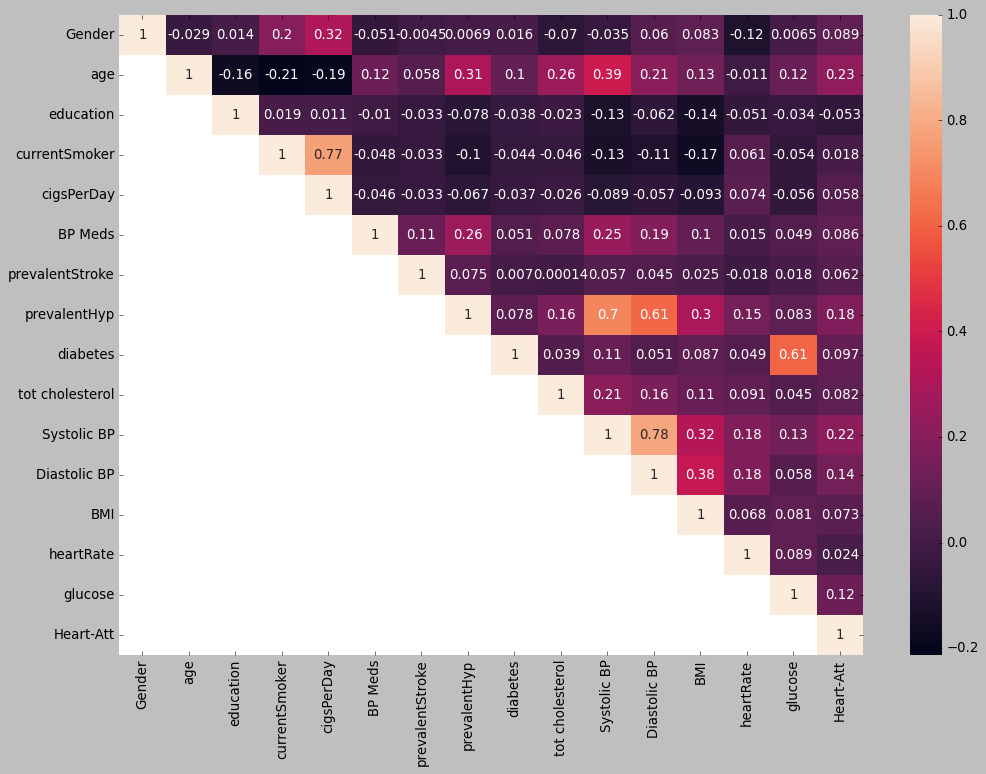

In [163]:
plt.figure(figsize=(15,10)) # height and width
#Upper Triangle
sns.heatmap(df.corr(), annot=True,mask=np.tril(df.corr(),-1))

<Axes: >

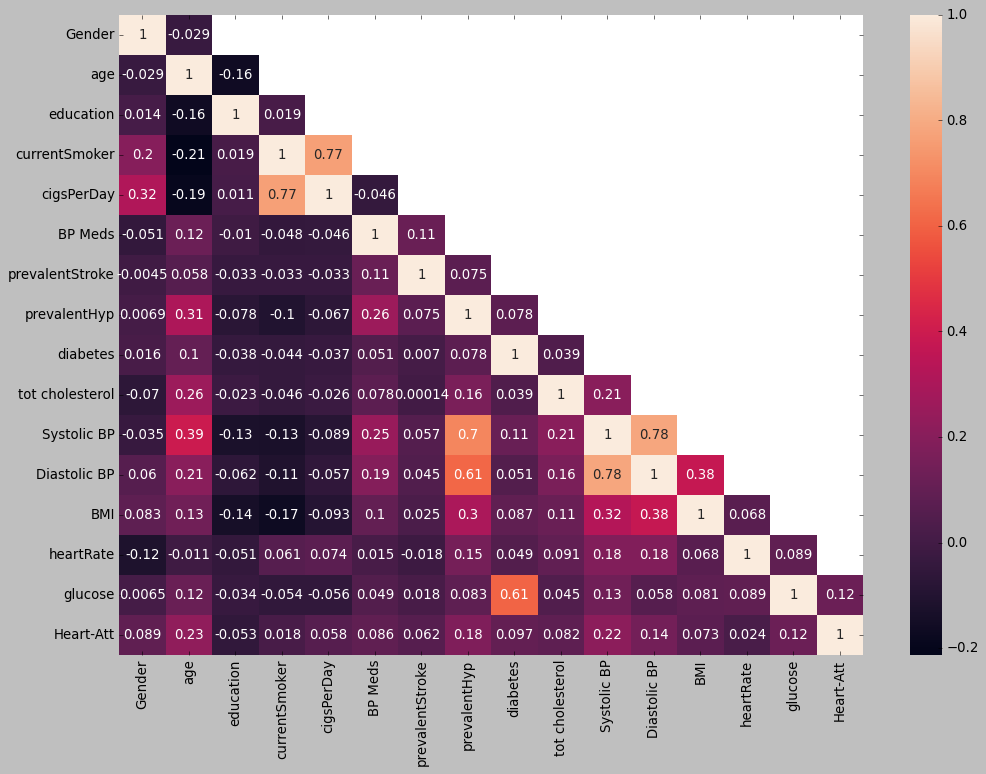

In [164]:
plt.figure(figsize=(15,10)) # height and width
#Lower Triangle
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+2))

In [165]:
data=df.copy()

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BP Meds          4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot cholesterol  4240 non-null   float64
 10  Systolic BP      4240 non-null   float64
 11  Diastolic BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 530.1 KB


In [167]:
data

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.951936,0
4237,0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [168]:
df.drop(['currentSmoker', 'diabetes', 'Diastolic BP'], axis=1, inplace=True) # Why?

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BP Meds          4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   tot cholesterol  4240 non-null   float64
 8   Systolic BP      4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  heartRate        4240 non-null   float64
 11  glucose          4240 non-null   float64
 12  Heart-Att        4240 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 430.8 KB


<Axes: >

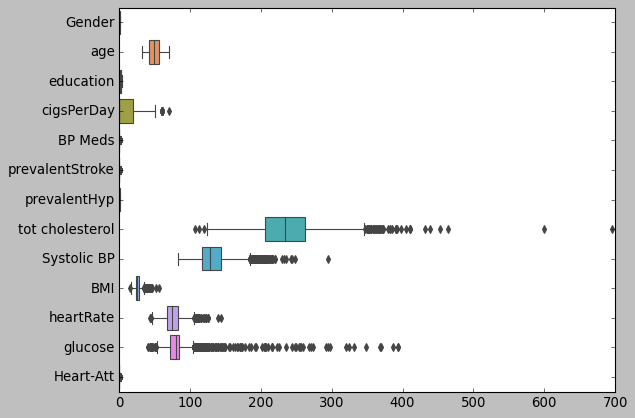

In [170]:
sns.boxplot(df, orient='h')
# Outliers are there so it needs to be treated         

## Outlier Treatment📤


In [176]:
# num=num-['Diastolic BP']
# num.drop('Diastolic BP', axis=0)
num.remove('Diastolic BP')

In [177]:
def removeOutlier(col):
    sorted(col)
    Q1, Q3=np.percentile(col, [25,75])
    IQR=Q3-Q1  #Inter-Quartile Range
    lr, ur=Q1-(IQR*1.5), Q3+IQR*1.5
    return lr, ur
for col in df[num].columns:
    lr, ur=removeOutlier(df[col])
    df[col]=np.where(df[col]>ur, ur, df[col])
    df[col]=np.where(df[col]<lr, lr, df[col])


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BP Meds          4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   tot cholesterol  4240 non-null   float64
 8   Systolic BP      4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  heartRate        4240 non-null   float64
 11  glucose          4240 non-null   float64
 12  Heart-Att        4240 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 430.8 KB


<Axes: >

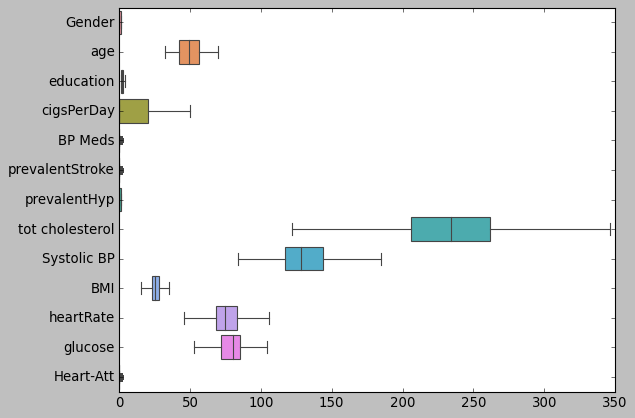

In [179]:
sns.boxplot(df, orient='h')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BP Meds          4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   tot cholesterol  4240 non-null   float64
 8   Systolic BP      4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  heartRate        4240 non-null   float64
 11  glucose          4240 non-null   float64
 12  Heart-Att        4240 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 430.8 KB


### Train Test Split


In [181]:
df

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,20.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44.0,1.0,15.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,81.951936,0
4237,0,52.0,2.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,104.500000,0
4238,1,40.0,3.0,0.0,0.0,0.0,1.0,185.0,141.0,25.60,67.0,72.000000,0


In [182]:
X = df.loc[:, df.columns!='Heart-Att']
Y=df['Heart-Att']

In [183]:
X

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.000000
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.000000
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.000000
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.000000
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,20.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.000000
4236,0,44.0,1.0,15.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,81.951936
4237,0,52.0,2.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,104.500000
4238,1,40.0,3.0,0.0,0.0,0.0,1.0,185.0,141.0,25.60,67.0,72.000000


In [184]:
X.shape[1]

12

In [185]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: Heart-Att, Length: 4240, dtype: int64

In [186]:
Y.shape

(4240,)

In [187]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1) # by def random state is 1

In [188]:
x_train

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose
4033,0,49.0,1.0,15.0,0.0,0.0,0.0,233.0,112.5,27.87,96.0,80.000000
3710,1,46.0,3.0,30.0,0.0,0.0,1.0,154.0,141.0,22.76,65.0,65.000000
1453,1,46.0,1.0,20.0,0.0,0.0,0.0,279.0,118.0,22.78,58.0,74.000000
2425,0,63.0,1.0,0.0,0.0,0.0,0.0,229.0,120.0,25.58,78.0,73.000000
1010,1,42.0,1.0,30.0,0.0,0.0,0.0,232.0,111.5,28.30,90.0,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,45.0,2.0,30.0,0.0,0.0,1.0,181.0,138.5,26.32,90.0,81.951936
2763,1,46.0,1.0,9.0,0.0,0.0,0.0,255.0,113.5,23.22,60.0,81.951936
905,1,38.0,2.0,20.0,0.0,0.0,1.0,309.0,148.0,30.85,95.0,81.951936
3980,0,55.0,2.0,0.0,0.0,0.0,0.0,273.0,125.0,23.05,85.0,67.000000


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BP Meds          4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   tot cholesterol  4240 non-null   float64
 10  Systolic BP      4240 non-null   float64
 11  Diastolic BP     4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 530.1 KB


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BP Meds          4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   tot cholesterol  4240 non-null   float64
 8   Systolic BP      4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  heartRate        4240 non-null   float64
 11  glucose          4240 non-null   float64
 12  Heart-Att        4240 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 430.8 KB


In [191]:
y_train

4033    0
3710    0
1453    0
2425    0
1010    0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Heart-Att, Length: 2968, dtype: int64

In [192]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BP Meds          4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   tot cholesterol  4240 non-null   float64
 8   Systolic BP      4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  heartRate        4240 non-null   float64
 11  glucose          4240 non-null   float64
 12  Heart-Att        4240 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 430.8 KB


In [194]:
model.fit(x_train, y_train)

LogisticRegression()

In [196]:
# Understanding other example
import numpy as np
from sklearn.linear_model import LogisticRegression

# Sample Data
X = np.array([[2], [4], [6], [8], [10]])  # Study hours
y = np.array([0, 0, 1, 1, 1])            # Pass/Fail (0=Fail, 1=Pass)

# Model
model = LogisticRegression()
model.fit(X, y)

# Prediction
new_data = np.array([[5]])  # 5 hours of study
prediction = model.predict(new_data)
print(f"Prediction: {'Pass' if prediction[0] == 1 else 'Fail'}")

Prediction: Pass
[1]
